In [1]:
import numpy as np
import pandas as pd


## THE MOVIELENS DATA SET

In [2]:
! ls


movielens  Pandas practice.ipynb  Untitled.ipynb


In [3]:
!cat ./movielens/movies.csv | wc -l

9126


In [4]:
!head -5 ./movielens/ratings.csv

In [5]:
#movies
movies = pd.read_csv('./movielens/movies.csv')
print(movies.shape)
movies.head(15)
movies.describe()

(9125, 3)


,movieId
count,9125.000000
mean,31123.291836
std,40782.633604
min,1.000000
25%,2850.000000
50%,6290.000000
75%,56274.000000
max,164979.000000


In [14]:
# import tags
tags = pd.read_csv('./movielens/tags.csv')
print(len(tags))
tags.head()
tags.sample(5)


1296


,userId,movieId,tag,timestamp
969,547,8125,afi,1182393855
1169,547,101895,toplist13,1383626036
605,431,520,very funny!,1140454299
8,15,100365,activist,1425876220
1068,547,61240,toplist08,1230814624


In [15]:
# import ratings 

ratings = pd.read_csv('./movielens/ratings.csv')
ratings.head()
ratings.sample(5)


,userId,movieId,rating,timestamp
84906,570,457,4.0,1475783286
94215,624,4351,1.0,1160936767
47933,353,1387,3.5,1113052996
8275,56,223,4.0,1467004879
25185,185,239,2.0,1003523380


In [79]:
# I am being asked to remove the timestamps for current analysis per the tutorial, we shall see

# del tags['timestamp']
# del ratings['timestamp']

## Describe and explore data 


In [18]:
movies.describe()
movies.sample(5)

,movieId,title,genres
2374,2959,Fight Club (1999),Action|Crime|Drama|Thriller
6231,37386,Aeon Flux (2005),Action|Sci-Fi
1254,1581,Out to Sea (1997),Comedy
6388,44204,Tsotsi (2005),Crime|Drama
1479,1916,Buffalo '66 (a.k.a. Buffalo 66) (1998),Drama|Romance


In [16]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [19]:
tags.describe()


,userId,movieId,timestamp
count,1296.000000,1296.000000,1.296000e+03
mean,417.026235,42278.949846,1.324337e+09
std,142.183440,44628.345568,1.093886e+08
min,15.000000,1.000000,1.137217e+09
25%,346.000000,2988.000000,1.243455e+09
50%,431.000000,26958.500000,1.342849e+09
75%,547.000000,72268.250000,1.440380e+09
max,663.000000,164979.000000,1.476651e+09


## LOOK FOR EMPTIES 


In [20]:
# ANY NULLS IN THE MOVIES DB /
movies.shape
movies.isnull().any()

# Great, no empties in there

movieId    False
title      False
genres     False
dtype: bool

In [21]:
# ANY NULLS IN THE RATINGS 
ratings.shape
ratings.isnull().any()

#More good news, no empties in here as well

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [22]:
# ANY NULLS IN TAGS
tags.shape
tags.isnull().any()

#Doesn't seem to be any nulls in tags as well

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

## Visualize the data 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f1c01c7f0>]], dtype=object)

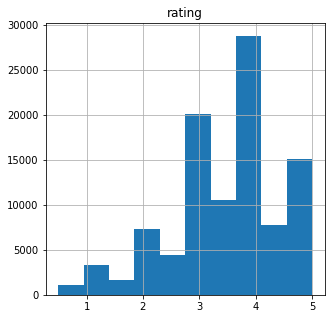

In [23]:
%matplotlib inline
ratings.hist(column='rating',figsize=(5,5))


## As you can see in the histogram above that the most common rating for a movie is 4.0

In [26]:
movies.describe()
movies.head()

#count is 9125

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### In the following cell, I did 2 things. I created the count of how many ratings the movie had in the variable ratings_count, but now i realize that it was a dumb mistake. What it did was add up all the ratings a movie had. So, for example if it had two ratings of 4.0 and 4.0, this variable added them and gave me 8.0, instead of counting them as 2 seperate ratings. While pondering this, i decided to use average rating as a more effective measure of going forward with this.

In [34]:

ratings_count = ratings[['movieId', 'rating']].groupby('movieId').count()
ratings_count.describe()
ratings.head()


avg_rating =  pd.DataFrame(ratings.groupby('movieId', as_index=False).mean())
avg_rating.isnull().any()   #no null values
del avg_rating['userId']
# ratings_count.isnull().any()  #no null values

# ratings_count.sample(5)
avg_rating.sample(5)
avg_rating.describe()
# avg_rating.isnull().any()   

#No empty cells


,movieId,rating,timestamp
count,9066.000000,9066.000000,9.066000e+03
mean,30772.100044,3.292054,1.186347e+09
std,40418.420801,0.881968,1.661652e+08
min,1.000000,0.500000,8.282140e+08
25%,2829.750000,2.843750,1.043909e+09
50%,6248.000000,3.500000,1.161659e+09
75%,55827.500000,3.966250,1.333994e+09
max,163949.000000,5.000000,1.476588e+09


**Let's create a new dataframe where we can see movies with their ratings all in one place. we will be merging two data frames. In the last cell, we created a new DataFrame called avg_ratings which is a result of taking the average of the ratings of each movie. We, then merge it with the movies DataFrame where we originally loaded our data set **

In [372]:
movie_ratings = movies.merge(avg_rating, how='outer', on='movieId')
# len(movie_ratings)= 9066

del movie_ratings['timestamp']

#MISSING VALUES 
movie_ratings.isnull().any()   #ratings has some missing values 

movie_ratings['movieId'].count()-movie_ratings['rating'].count()
    #59 VALUES IN THE RATING COLUMN ARE MISSING 
    
movie_ratings = movie_ratings.dropna()
movie_ratings.describe()
movie_ratings.sample(5)

,movieId,title,genres,rating
4124,5417,"Fast Runner, The (Atanarjuat) (2001)",Drama|Fantasy,3.000000
6015,31156,Abbott and Costello Meet the Invisible Man (1951),Comedy|Sci-Fi,3.000000
2842,3556,"Virgin Suicides, The (1999)",Drama|Romance,3.583333
424,476,"Inkwell, The (1994)",Comedy|Drama,4.000000
564,653,Dragonheart (1996),Action|Adventure|Fantasy,3.112903


In [44]:
high_rated = movie_ratings.loc[movie_ratings['rating'] >= 4.0]
# len(high_rated) = 2234
high_rated.sample(5)


,movieId,title,genres,rating
7259,69559,"File on Thelma Jordan, The (1950)",Crime|Drama|Film-Noir|Mystery,4.0
2003,2501,October Sky (1999),Drama,4.1
1204,1493,Love and Other Catastrophes (1996),Romance,4.0
8778,121231,It Follows (2014),Horror,4.0
9118,162376,Stranger Things,Drama,4.5


## Next i am going to seperate movies based on the decade in which they came out. I am interested in movies that came out after 70s so let's start with 70s

In [125]:
all70s = movie_ratings[movie_ratings['title'].str.contains('197')]
high_70s = high_rated[high_rated['title'].str.contains('197')]
four_70s= high_70s['movieId'].count()/all70s['movieId'].count() *100
high_70s.sample(5)
# four_70s


,movieId,title,genres,rating
1006,1252,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller,4.335526
5605,8923,Tess (1979),Drama|Romance,4.250000
6619,50742,7 Plus Seven (1970),Documentary,4.500000
1616,2055,Hot Lead and Cold Feet (1978),Action|Comedy|Western,4.000000
4774,6725,Sgt. Pepper's Lonely Hearts Club Band (1978),Adventure|Musical,5.000000


In [56]:
all70s.describe()

,movieId,rating
count,548.000000,548.000000
mean,14175.523723,3.521031
std,22228.794705,0.791868
min,111.000000,0.500000
25%,3097.500000,3.000000
50%,5346.500000,3.600000
75%,8557.000000,4.000000
max,152844.000000,5.000000


In [57]:
high_70s.describe()

,movieId,rating
count,188.000000,188.000000
mean,20305.468085,4.267447
std,28492.442872,0.332293
min,111.000000,4.000000
25%,3507.000000,4.000000
50%,6519.500000,4.115385
75%,26415.250000,4.500000
max,152844.000000,5.000000


**Based on these two tables of the, we are going to take a look at the movies listed in the dataset. Based on the filters, we created we have isolated the movies that were released in 70s,80s(all70s and all80s variables respectively) and then movies released in these decades whose average rating is atleast a 4.0(high_70s and high_80s variables respectively)  **



In [127]:
print('All movies released in the 1970s = ', all70s['movieId'].count(),'\n')
print('Movies of 70s with atleast a 4.0 rating =',high_70s['movieId'].count(),'\n')


print('Of all the movies released in the 1970s',four_70s,'% were rated at least a 4.0 or above')


All movies released in the 1970s =  548 

Movies of 70s with atleast a 4.0 rating = 188 

Of all the movies released in the 1970s 34.3065693431 % were rated at least a 4.0 or above


## Ahh...the 80s. Let's see what you hold 

In [129]:
all80s = movie_ratings[movie_ratings['title'].str.contains('198')]
high_80s = high_rated[high_rated['title'].str.contains('198')]
four_80s =high_80s['movieId'].count()/all80s['movieId'].count()*100
high_80s.sample(5)
# four_80s



,movieId,title,genres,rating
3697,4717,"Battle Creek Brawl (Big Brawl, The) (1980)",Action|Comedy,5.0
1925,2415,Violets Are Blue... (1986),Drama|Romance,4.0
6526,48165,"Seventh Continent, The (Der siebente Kontinent...",Drama,4.5
3633,4626,Miracle Mile (1989),Drama|Romance|Sci-Fi,5.0
2983,3731,Cutter's Way (1981),Drama|Thriller,4.0


In [81]:
all80s.describe()

,movieId,rating
count,1198.000000,1198.000000
mean,7813.555092,3.301355
std,16134.495147,0.855235
min,541.000000,0.500000
25%,2531.500000,2.902273
50%,4115.500000,3.500000
75%,5551.750000,3.935069
max,159462.000000,5.000000


In [84]:
high_80s.describe()

,movieId,rating
count,283.000000,283.000000
mean,11627.339223,4.254628
std,21262.932892,0.345742
min,541.000000,4.000000
25%,3139.000000,4.000000
50%,4567.000000,4.052632
75%,6124.000000,4.500000
max,128846.000000,5.000000


In [132]:
print('Total number of movies that came out in the 1980s =', all80s['movieId'].count(),'\n')
print('Movies of the 80s with average rating of atleast 4.0=', high_80s['movieId'].count(),'\n')
print('Of all the movies released in the 1980s', four_80s,'% had an average rating of atleast 4.0 or above')

Total number of movies that came out in the 1980s = 1198 

Movies of the 80s with average rating of atleast 4.0= 283 

Of all the movies released in the 1980s 23.6227045075 % had an average rating of atleast 4.0 or above


### Just for fun, let's do a quick run of the 90s 

In [174]:
all90s = movie_ratings[movie_ratings['title'].str.contains('199')]
high_90s = high_rated[high_rated['title'].str.contains('199')]
four_90s=  high_90s['movieId'].count()/all90s['movieId'].count()*100
high_90s.sample(5)
# four_90s

,movieId,title,genres,rating
8932,136445,George Carlin: Back in Town (1996),Comedy,5.0
162,184,Nadja (1994),Drama,4.5
1326,1669,"Tango Lesson, The (1997)",Romance,4.0
1814,2292,Overnight Delivery (1998),Comedy|Romance,4.0
8108,96004,Dragon Ball Z: The History of Trunks (Doragon ...,Action|Adventure|Animation,4.0


In [175]:
all90s.describe()

,movieId,rating
count,2207.000000,2207.000000
mean,5890.137290,3.252825
std,17138.674662,0.811861
min,1.000000,0.500000
25%,658.500000,2.857143
50%,1824.000000,3.333333
75%,3210.500000,3.800000
max,145307.000000,5.000000


In [176]:
high_90s.describe()

,movieId,rating
count,419.000000,419.000000
mean,12462.842482,4.289277
std,27966.468530,0.361356
min,26.000000,4.000000
25%,824.000000,4.000000
50%,2357.000000,4.120000
75%,6200.500000,4.500000
max,141886.000000,5.000000


In [177]:
print('Total number of movies that came out in the 1990s =', all90s['movieId'].count(),'\n')
print('Movies of the 90s with average rating of atleast 4.0=', high_90s['movieId'].count(),'\n')
print('Of all the movies released in the 1990s',four_90s,'% had an average rating of atleast 4.0 or above')

Total number of movies that came out in the 1990s = 2207 

Movies of the 90s with average rating of atleast 4.0= 419 

Of all the movies released in the 1990s 18.9850475759 % had an average rating of atleast 4.0 or above


### Let's make a pretty table where we can see the number of movies released in each decade, and what percentage of those were rated a 4.0 or above

In [178]:
bigTable = {'70s': pd.Series([all70s['movieId'].count(),high_70s['movieId'].count(),four_70s],index=['total movies', '>=4.0', '% rated higher than 4.0']),
           
           '80s':pd.Series([all80s['movieId'].count(),high_80s['movieId'].count(),four_80s], index=['total movies','>=4.0','% rated higher than 4.0']),
            
           '90s':pd.Series([all90s['movieId'].count(),high_90s['movieId'].count(),four_90s], index=['total movies','>=4.0','% rated higher than 4.0'])
           }

bigTable

{'70s': total movies               548.000000
 >=4.0                      188.000000
 % rated higher than 4.0     34.306569
 dtype: float64, '80s': total movies               1198.000000
 >=4.0                       283.000000
 % rated higher than 4.0      23.622705
 dtype: float64, '90s': total movies               2207.000000
 >=4.0                       419.000000
 % rated higher than 4.0      18.985048
 dtype: float64}

In [179]:
movie_table = pd.DataFrame(bigTable)
movie_table

# movie_table.hist(column= '70s',figsize=(10,15))

,70s,80s,90s
total movies,548.000000,1198.000000,2207.000000
>=4.0,188.000000,283.000000,419.000000
% rated higher than 4.0,34.306569,23.622705,18.985048


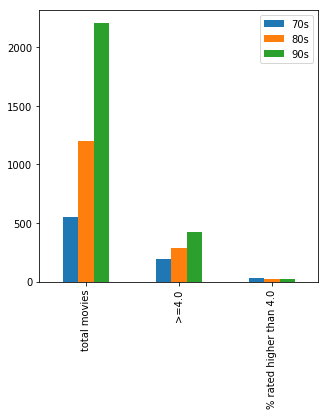

In [180]:
movie_table.plot(kind='bar', figsize=(5,5))

# Based on this analysis presented in this notebook, we can surmise a few things, that about the three successive decades of 70s to 90s.

* The 80s and 90s were busier decades for movies than the 70s. The number of movies double each decade from 548 in the 70s to 1198 in the 80s to 2207 in the 90s. 
* As we can see in the bar graph, 90s was definitely not the decade for critical love for movies, as only 18.98% of 2207 theatrically released films recieved atleast a 4.0 out of 5 point rating. 
* The 70s come out as clear winner. 34.306% of 548 theatrically released movies recieved an average rating of 4.0 or more out of 5 point rating.


# SCI-FI GENRE AND THE 2010s

In [191]:
movie_ratings.sample(10)

,movieId,title,genres,rating
1502,1940,Gentleman's Agreement (1947),Drama,4.071429
3120,3908,Urban Legends: Final Cut (2000),Horror,2.900000
3474,4390,Rape Me (Baise-moi) (2000),Crime|Drama|Thriller,3.000000
5653,9005,Fire in the Sky (1993),Drama|Mystery|Sci-Fi,2.500000
7488,75349,Teenage Caveman (2002),Horror|Sci-Fi|Thriller,2.500000
8978,140741,Get Your Stuff (2000),Drama|Romance,5.000000
128,149,Amateur (1994),Crime|Drama|Thriller,4.333333
8866,131451,The Atticus Institute (2015),Horror,1.000000
2733,3427,Coogan's Bluff (1968),Crime,1.500000
1233,1543,"Designated Mourner, The (1997)",Drama,5.000000


In [187]:
high_rated.sample(5)

,movieId,title,genres,rating
5412,8410,Suddenly (1954),Crime|Drama|Film-Noir,4.000000
3374,4235,Amores Perros (Love's a Bitch) (2000),Drama|Thriller,4.183333
6583,49530,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War,4.040541
5813,26509,Electric Dreams (1984),Comedy|Drama|Romance|Sci-Fi,4.500000
1184,1463,That Old Feeling (1997),Comedy|Romance,4.500000


In [280]:
all2k10 = movie_ratings[movie_ratings['title'].str.contains('201')]# & movie_ratings['genres'].str.contains('Sci-Fi')]
all2k10=all2k10.reset_index()#.drop(0)
del all2k10['index']
all2k10.drop([0])

all2k_count = all2k10['movieId'].count()
# all2k_count
all2k10.sample(5)

,movieId,title,genres,rating
69,79057,Predators (2010),Action|Sci-Fi|Thriller,3.166667
158,82461,Tron: Legacy (2010),Action|Adventure|Sci-Fi|IMAX,2.884615
1318,157296,Finding Dory (2016),Adventure|Animation|Comedy,3.333333
871,109848,Under the Skin (2013),Horror|Sci-Fi|Thriller,3.166667
167,83086,Burlesque (2010),Drama|Musical|Romance,1.000000


** There was a film in the all2k10 which was actually released in the 1980s but had the word 2010 in it so i got rid of that film **

In [270]:
all2k10.describe()

,movieId,rating
count,1347.000000,1347.000000
mean,105797.183370,3.093564
std,20907.172483,0.975406
min,2311.000000,0.500000
25%,90416.500000,2.500000
50%,102407.000000,3.166667
75%,115593.000000,3.900000
max,163949.000000,5.000000


In [282]:
scifi_2k = all2k10[all2k10['genres'].str.contains('Sci-Fi')]
scifi_count = scifi_2k['movieId'].count()
scifi_2k.describe()
# scifi_count

,movieId,rating
count,159.000000,159.000000
mean,105475.534591,3.067894
std,22005.260169,0.923710
min,2311.000000,0.500000
25%,90297.000000,2.500000
50%,103228.000000,3.166667
75%,115696.500000,3.727833
max,161918.000000,5.000000


In [358]:
high2k =  high_rated[high_rated['title'].str.contains('201')] 
high2k.sample(5)
high2k_count = high2k['movieId'].count()
percent_2k = high2k_count/all2k_count *100
# percent_2k
high2k_count


314

In [301]:
high2k.describe()

,movieId,rating
count,314.000000,314.000000
mean,108238.745223,4.277725
std,21249.742830,0.366240
min,74324.000000,4.000000
25%,92589.000000,4.000000
50%,104338.000000,4.045608
75%,118686.250000,4.500000
max,163949.000000,5.000000


In [319]:
hifi_2k = high2k[high2k['genres'].str.contains('Sci-Fi')]
hifi_count = hifi_2k['movieId'].count()
hifi_count
hifi_percent= hifi_count/scifi_count *100
hifi_percent
# hifi_2k.sample(5)

15.09433962264151

In [309]:
hifi_2k.describe()

,movieId,rating
count,24.000000,24.000000
mean,102726.833333,4.315836
std,19679.636851,0.365022
min,79132.000000,4.000000
25%,88888.750000,4.008152
50%,98866.500000,4.134405
75%,107561.750000,4.500000
max,158956.000000,5.000000


# Let's also keep another genre of movies to compare Sci-Fi to, say Dramas


In [354]:
all_dramas = all2k10[all2k10['genres'].str.contains('Drama')]
drama_count= all_dramas['movieId'].count()

drama_count

573

In [359]:
hi_dramas = high2k[high2k['genres'].str.contains('Drama')]
hi_dramas_count = hi_dramas['movieId'].count()
hi_dramas_count


163

In [362]:
drama_percent = hi_dramas_count/drama_count*100
drama_percent

28.446771378708551

## All movies in 2010s

In [328]:
print('Total number of movies that came out in the 2010s =', all2k_count,'\n')
print('Movies of the 2010s with average rating of atleast 4.0=', high2k_count,'\n')
print('Of all the movies released in the 2010s',percent_2k,'% had an average rating of atleast 4.0 or above')

Total number of movies that came out in the 2010s = 1347 

Movies of the 2010s with average rating of atleast 4.0= 314 

Of all the movies released in the 2010s 23.3110616184 % had an average rating of atleast 4.0 or above


## Sci-Fi movies in 2010s 

In [335]:
print('Total number of Sci-fi related movies released in 2010s =',scifi_count,'\n')
print('Sci-Fi movies with average rating of atleast 4.0 =',hifi_count,'\n')
print('Percent of the high rated movies that were Sci-Fi =', hifi_percent,'\n')

Total number of Sci-fi related movies released in 2010s = 159 

Sci-Fi movies with average rating of atleast 4.0 = 24 

Percent of the high rated movies that were Sci-Fi = 15.0943396226 



## Dramas in 2010s 

In [366]:
print('Total number of Drama related movies released in 2010s =',drama_count,'\n')
print('Dramatic movies with average rating of atleast 4.0 =',hi_dramas_count,'\n')
print('Percent of the high rated movies that were Dramas =', drama_percent,'\n')

Total number of Drama related movies released in 2010s = 573 

Dramatic movies with average rating of atleast 4.0 = 163 

Percent of the high rated movies that were Dramas = 28.4467713787 



In [368]:
table_2k10 = {'All 2k10':pd.Series([all2k_count,high2k_count, percent_2k],
                    index= ['Total movies', 'with >=4.0 avg rating', '% of 4 vs all']),
             'SciFi-2k10s':pd.Series([scifi_count,hifi_count, hifi_percent],
                    index= ['Total movies', 'with >=4.0 avg rating', '% of 4 vs all']) ,
             'Dramas':pd.Series([drama_count,hi_dramas_count,drama_percent],
                    index= ['Total movies', 'with >=4.0 avg rating', '% of 4 vs all'])
             }
df_2k10=pd.DataFrame(table_2k10)
df_2k10

,All 2k10,Dramas,SciFi-2k10s
Total movies,1347.000000,573.000000,159.00000
with >=4.0 avg rating,314.000000,163.000000,24.00000
% of 4 vs all,23.311062,28.446771,15.09434


## Let's plot the bar charts of these movies 

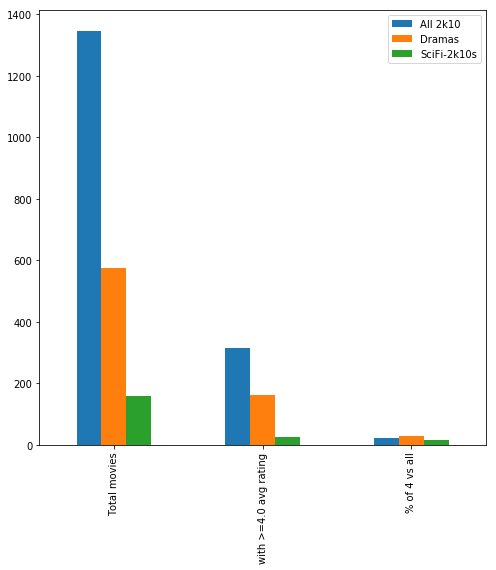

In [370]:
df_2k10.plot(kind='bar', figsize=(8,8))

**Based on this bar plot, we can see some very interesting things. The percentage of movies made in 2010s, 23.31% of those movies have an average rating of 4.0 or above. Contrasting this to the 80s, where 23.66% of the movies released had a 4.0 or above average rating. The sample size isn't very wide apart either. The total number of movies released in the 80s was 1198 used in this analysis whereas the movies in 2010s upto 2016, which is the extent of this dataset, is 1347.    **

** In terms of the Sci-Fi movies released in 2010, 15.09% were rated with an average of 4.0 or above with total number of 159 movies made in the genre up until 2016. **


** Compare this to Dramas in 2010s 28.45% of them have an average rating of 4.0 and above with a grand total of 573 movies made under the genre**